In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pylab as plt
%matplotlib inline
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

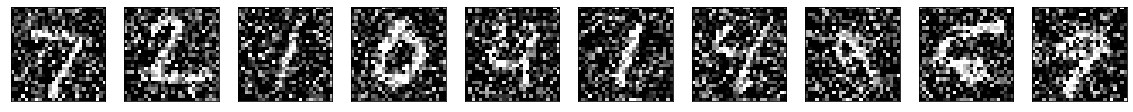

In [3]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [4]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100


2023-03-01 11:32:15.860981: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3402225000 Hz
2023-03-01 11:32:15.861790: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c8f19ac4b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-03-01 11:32:15.861827: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


60000/60000 [==============================] - 108s 2ms/sample - loss: 0.6810 - val_loss: 0.6612
Epoch 2/100
60000/60000 [==============================] - 159s 3ms/sample - loss: 0.6258 - val_loss: 0.5851
Epoch 3/100
60000/60000 [==============================] - 173s 3ms/sample - loss: 0.5435 - val_loss: 0.5170
Epoch 4/100
60000/60000 [==============================] - 185s 3ms/sample - loss: 0.5046 - val_loss: 0.5021
Epoch 5/100
60000/60000 [==============================] - 182s 3ms/sample - loss: 0.4943 - val_loss: 0.4936
Epoch 6/100
60000/60000 [==============================] - 183s 3ms/sample - loss: 0.4859 - val_loss: 0.4852
Epoch 7/100
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.4774 - val_loss: 0.4764
Epoch 8/100
60000/60000 [==============================] - 167s 3ms/sample - loss: 0.4684 - val_loss: 0.4668
Epoch 9/100
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.4582 - val_loss: 0.4556
Epoch 10/100
60000/60000 [=====